In [0]:
from google.colab import drive
drive.mount("/mnt/jm")


In [0]:
!cp -r /mnt/jm/'My Drive'/MLData/Project_data.zip ./

In [0]:
!ls -lhtr 
!unzip Project_data.zip
!ls Project_data

In [0]:
import numpy as np
import os
#from scipy.misc import imread, imresize
from skimage import io
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
#tf.set_random_seed(30)
tf.random.set_seed(30)

In [0]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

In [0]:
train_path='./Project_data/train'
val_path='./Project_data/val'

train_doc = np.random.permutation(open('./Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('./Project_data/val.csv').readlines())

In [0]:
batch_size=10
t = np.random.permutation(train_doc)
num_batches=np.floor(t.shape[0]/batch_size)
num_batches

66.0

['WIN_20180925_17_30_26_Pro_00057.png', 'WIN_20180925_17_30_26_Pro_00013.png', 'WIN_20180925_17_30_26_Pro_00045.png', 'WIN_20180925_17_30_26_Pro_00029.png', 'WIN_20180925_17_30_26_Pro_00027.png']
AxesImage(54,36;334.8x217.44)
(120, 160, 3)


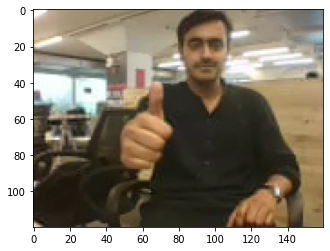

In [0]:
# plot an image 
img_MetaIdx=3
img_idx=9
imgs = os.listdir(train_path+'/'+ t[img_MetaIdx + (5*batch_size)].split(';')[0]) 
print(imgs[:5])
image = io.imread(train_path+'/'+ t[img_MetaIdx + (5*batch_size)].strip().split(';')[0]
    +'/'+imgs[img_idx])
print(plt.imshow(image))
print(image.shape)

In [0]:
# one hot vector encoding for each image like below
x=5
y=image.shape[1]
z=image.shape[2]
batch_data = np.zeros((batch_size,x,y,z,3))

Text(0.5, 0.98, 'Different Channels of Image')

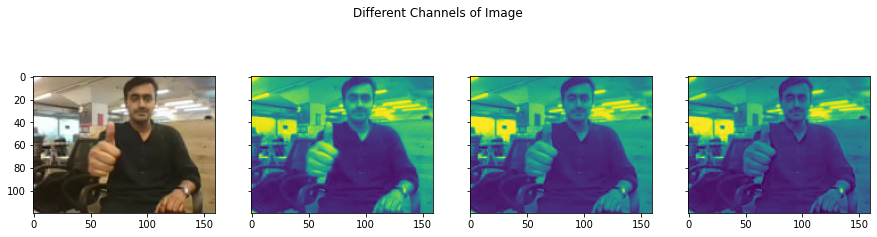

In [0]:
# plotting the original image and the RGB channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
ax1.imshow(image)

# RGB channels
ax2.imshow(image[:, : , 0])
ax3.imshow(image[:, : , 1])
ax4.imshow(image[:, : , 2])
f.suptitle('Different Channels of Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


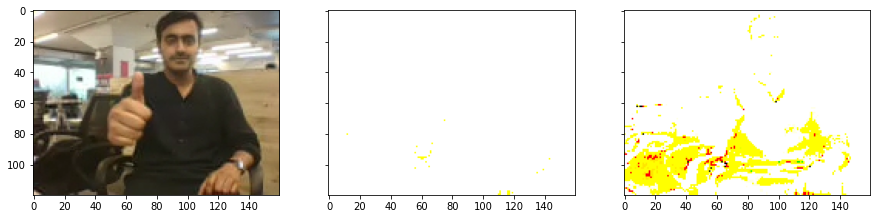

In [0]:
# normalizing the image 
norm1_image = image/255
norm2_image = image - np.min(image)/np.max(image) - np.min(image)
norm3_image = image - np.percentile(image,5)/ np.percentile(image,95) - np.percentile(image,5)
plot_image([norm1_image,norm2_image,norm3_image])

In [0]:
source_path=train_path
folder_list=train_doc
print(source_path)
print(len(folder_list[:20]))

./Project_data/train
20


In [0]:
# trying out starter generator code in bits n pieces 
img_idx=folder_list[:3]
t = np.random.permutation(folder_list) 
for idx,item in enumerate(img_idx):
    imgs = os.listdir(source_path+'/'+ t[2 + (5*batch_size)].split(';')[0]) 
    print(len(imgs))
    print(idx, item)
    print(t[2 + (5*batch_size)].strip().split(';')[0])
    image = io.imread(source_path+'/'+ t[2 + (5*batch_size)].strip().split(';')[0]+'/'+imgs[idx])
    print(image.shape)

30
0 WIN_20180926_16_54_08_Pro_Right_Swipe_new;Right_Swipe_new;1

WIN_20180925_17_22_32_Pro_Right_Swipe_new
(120, 160, 3)
30
1 WIN_20180925_18_02_58_Pro_Thumbs_Down_new;Thumbs_Down_new;3

WIN_20180925_17_22_32_Pro_Right_Swipe_new
(120, 160, 3)
30
2 WIN_20180925_17_33_08_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_22_32_Pro_Right_Swipe_new
(120, 160, 3)


### Generator

This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with img_idx, y,z and normalization such that you get high accuracy.


In [0]:
def generator(source_path, folder_list, batch_size, no_of_image):
    print( '\nSource path = ', source_path, '; batch size =', batch_size)
    img_idx=folder_list[:no_of_image] # create a list of image numbers you want to use for a particular video
    x=len(img_idx)
    y=100
    z=100
 
    while True:
        t = np.random.permutation(folder_list)        
        #num_batches = int(np.floor(t.shape[0]/batch_size))  # calculate the number of batches
        num_batches = len(folder_list)//batch_size  # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
          batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
          batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output

          for folder in range(batch_size): # iterate over the batch_size
            imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in

              image = io.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[idx])                  
                    
              #crop the images and resize them. Note that the images are of 2 different shape 
              #and the conv3D will throw error if the inputs in a batch have different shapes                    
              image=retuenCorppedImage(image)

              batch_data[folder,idx,:,:,0] = image[:,:,0]/255 #normalise and feed in the image
              batch_data[folder,idx,:,:,1] = image[:,:,1]/255 #normalise and feed in the image
              batch_data[folder,idx,:,:,2] = image[:,:,2]/255 #normalise and feed in the image          
                     
            batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
  
          #batch_data,batch_labels=returnTupleOfBatchDataNBatchLabels(batch_size,batch,img_idx,source_path,t,x,y,z,batch_data,batch_labels)            
          yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        rem_batch = (len(folder_list) - (num_batches * batch_size))
        if(len(folder_list) % batch_size != 0):
          num_batches=rem_batch
      
def retuenCorppedImage(image):
  # image resize by selecting image of dimension higher than 100 x 100
  # Also cropping the center 100 x 100 portion
  if image.shape[0] > 100 and image.shape[1] > 100:
    h,w,_ = image.shape
    image = image[int(h/2)-50:int(h/2)+50, int(w/2)-50:int(w/2)+50, : ]
  
  return image



### Model - Conv3D

Here you make the model using different functionalities that Keras provides. Remember to use Conv3D and MaxPooling3D and not Conv2D and Maxpooling2D for a 3D convolution model. You would want to use TimeDistributed while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

#write your model here

from keras.regularizers import l2
# channels last is the format used by tensorflow 
K.set_image_data_format('channels_last')

num_classes = 5
img_h=100
img_w=100
#img_depth=len(folder_list[:10]) * 3  # no_of_image * channels
#img_depth=len(folder_list[:10])

def get_model3D(img_depth=None):
    
    if img_depth is None:
      img_depth=len(train_doc[:10])
    
    model = Sequential()
    model.add(Conv3D(32, (3, 3, 3), strides=(1,1,1), padding='same',
                 input_shape=(img_depth,img_h,img_w,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    model.add(Conv3D(64, (3, 3, 3), strides=(1,1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    

    model.add(Conv3D(128, (3, 3, 3), strides=(1,1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
    # Adding one dense layer with 512 neurons
    model.add(Flatten())
    model.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
    
    # Adding fully connected and 5-softmax layer
    model.add(Dense(num_classes, activation='softmax', name='model3DConv'))
    
    #model = Model(inputs=base_model.input, outputs=x)
    return model

In [14]:
optimiser = 'SGD' #write your optimizer
model=get_model3D()
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 10, 100, 100, 32)  2624      
_________________________________________________________________
activation_1 (Activation)    (None, 10, 100, 100, 32)  0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 100, 100, 32)  128       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 5, 50, 50, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 5, 50, 50, 64)     55360     
_________________________________________________________________
activation_2 (Activation)    (None, 5, 50, 50, 64)     0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 50, 50, 64)    

In [32]:


num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 3 # choose the number of epochs
print ('# epochs =', num_epochs)

batch_size=64
print ('# batch_size =', batch_size)

#num_batches=int(np.floor(train_doc.shape[0]/batch_size))
num_batches=int(np.floor(train_doc.shape[0]/batch_size))
print('# num_batches =',num_batches)

rem_batch = (train_doc.shape[0] - (num_batches * batch_size))
print('# rem_batch =',rem_batch)

# training sequences = 663
# validation sequences = 100
# epochs = 3
# batch_size = 64
# num_batches = 10
# rem_batch = 23


In [0]:
# just use 10 images initially to test the generator works
train_generator = generator(train_path, train_doc, batch_size, 10)
val_generator = generator(val_path, val_doc, batch_size, 10)

In [0]:
curr_dt_time = datetime.datetime.now()
model_name = 'Jyotisekhar_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                patience=2, min_lr=0.01, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [0]:
def getStepsPerEpoch(batch_size,train_doc,val_doc):
  num_train_sequences = len(train_doc)
  num_val_sequences = len(val_doc)
  if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
  else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

  if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
  else:
    validation_steps = (num_val_sequences//batch_size) + 1
  return (steps_per_epoch,validation_steps)

Let us now fit the first model. This will start training the model and with the help of the checkpoints, we'll be able to save the model at the end of each epoch.
Running the model just for minimal dataset set with only 1 epoch to test the model fits with the generators

In [0]:
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=True, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/3

Source path = 
Source path =  ./Project_data/train ; batch size = 100
 ./Project_data/val ; batch size = 100
7/7 [==============================] - 37s 5s/step - loss: 15.8266 - categorical_accuracy: 0.3214 - val_loss: 11.5408 - val_categorical_accuracy: 0.1500

Epoch 00001: saving model to Jyotisekhar_init_2020-05-2415_39_32.384567/model-00001-15.82657-0.32143-11.54081-0.15000.h5
Epoch 2/3
7/7 [==============================] - 34s 5s/step - loss: 10.9810 - categorical_accuracy: 0.6243 - val_loss: 11.5041 - val_categorical_accuracy: 0.2000

Epoch 00002: saving model to Jyotisekhar_init_2020-05-2415_39_32.384567/model-00002-10.98105-0.62429-11.50408-0.20000.h5
Epoch 3/3
7/7 [==============================] - 23s 3s/step - loss: 10.6743 - categorical_accuracy: 0.7243 - val_loss: 11.4576 - val_categorical_accuracy: 0.3000

Epoch 00003: saving model to Jyotisekhar_init_2020-05-2415_39_32.384567/model-00003-10.67433-0.72429-11.45760-0.30000.h5


In [0]:
!ls -lhtr 
#!rm -rf Jyotisekhar_init_2020-05-2415_26_36.311959

total 1.6G
drwxr-xr-x 4 root root 4.0K Oct  3  2018 Project_data
drwxr-xr-x 1 root root 4.0K May 13 16:29 sample_data
-rw------- 1 root root 1.6G May 24 14:44 Project_data.zip
drwxr-xr-x 2 root root 4.0K May 24 15:41 Jyotisekhar_init_2020-05-2415_39_32.384567


#### Over-Fit the model 
This proves our model works. Hence feeding more data points into the model. In the first 1/2 runs I just used 10 images per batch just to see if model works as part of `Ablation`

Now lets try to over-fit the model on training data

In [0]:
# run the same model with more numner of epochs using same tiby data points just only 10 images in each of the 
# 100 batches and see if its overfits 
num_epochs=15
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=True, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
7/7 [==============================] - 37s 5s/step - loss: 10.4113 - categorical_accuracy: 0.8586 - val_loss: 11.4039 - val_categorical_accuracy: 0.3000

Epoch 00001: saving model to Jyotisekhar_init_2020-05-2415_39_32.384567/model-00001-10.41135-0.85857-11.40391-0.30000.h5
Epoch 2/15
7/7 [==============================] - 33s 5s/step - loss: 10.2329 - categorical_accuracy: 0.9257 - val_loss: 11.3670 - val_categorical_accuracy: 0.3100

Epoch 00002: saving model to Jyotisekhar_init_2020-05-2415_39_32.384567/model-00002-10.23292-0.92571-11.36696-0.31000.h5
Epoch 3/15
7/7 [==============================] - 22s 3s/step - loss: 10.1562 - categorical_accuracy: 0.9271 - val_loss: 11.3702 - val_categorical_accuracy: 0.3300

Epoch 00003: saving model to Jyotisekhar_init_2020-05-2415_39_32.384567/model-00003-10.15622-0.92714-11.37015-0.33000.h5
Epoch 4/15
7/7 [==============================] - 23s 3s/step - loss: 10.0185 - categorical_accuracy: 0.9857 - val_loss: 11.3831 - val_categor

The results show that the training accuracy increases consistently with each epoch. The training accuracy almost reaches 100% at the 10th iterations. The validation accuracy also increases and then plateaus out - this is a sign of 'good fit', i.e. we know that the model is at least able to learn from a small dataset, so we can hope that it will be able to learn from the entire set as well.

#### Hyperparameter Tuning
Now we can increase the data set and also perform some `hyperparameter tuning` on the model 

In [0]:
from keras import optimizers
from keras.callbacks import *

# range of learning rates to tune
hyper_parameters_for_lr = [0.2, 0.1, 0.01, 0.001]

# callback to append loss
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))

# instantiate a LossHistory() object to store histories
history = LossHistory()
plot_data = {}

# set no of iteration to 5 this time
num_epochs=3

# no of image for each frame to be used
no_of_image=10

batch_size=100

# call backs list 
callbacks_list = [history]
for lr in hyper_parameters_for_lr:

  print ('\n\n'+'=='*10 + '   Checking for LR={}  '.format(lr) + '=='*10 )
  sgd = optimizers.SGD(lr=lr, clipnorm=1.)

  # models and generators use 25 images for each of 100s batch_size
  model=get_model3D(no_of_image)
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

  train_generator = generator(train_path, train_doc, batch_size, no_of_image)
  val_generator = generator(val_path, val_doc, batch_size, no_of_image)
  
  
  model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, 
                        epochs=num_epochs, verbose=True,
                        callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, 
                    workers=1, initial_epoch=0)
    
  plot_data[lr]=history.losses




====================   Checking for LR=0.2  ====================
Epoch 1/3

Source path =  ./Project_data/val ; batch size = 100

Source path =  ./Project_data/train ; batch size = 100
7/7 [==============================] - 39s 6s/step - loss: 14.5172 - categorical_accuracy: 0.3071 - val_loss: 11.5399 - val_categorical_accuracy: 0.2300
Epoch 2/3
7/7 [==============================] - 34s 5s/step - loss: 11.9593 - categorical_accuracy: 0.3943 - val_loss: 11.5101 - val_categorical_accuracy: 0.2300
Epoch 3/3
7/7 [==============================] - 23s 3s/step - loss: 11.0462 - categorical_accuracy: 0.5729 - val_loss: 11.4863 - val_categorical_accuracy: 0.3300


====================   Checking for LR=0.1  ====================
Epoch 1/3

Source path =  ./Project_data/val
Source path =   ; batch size = 100
./Project_data/train ; batch size = 100
7/7 [==============================] - 40s 6s/step - loss: 13.1507 - categorical_accuracy: 0.2743 - val_loss: 11.5516 - val_categorical_accuracy: 0

#### Plot loss history for each LR

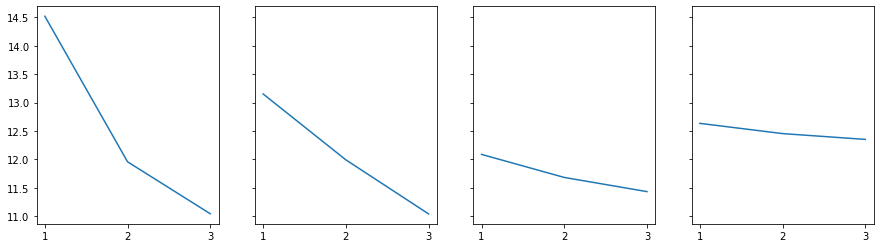

In [0]:
# plot loss history for each value of hyperparameter
f, axes = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
plt.setp(axes, xticks=np.arange(0, len(plot_data[0.01]), 1)+1)

for i, lr in enumerate(plot_data.keys()):
    axes[i].plot(np.arange(len(plot_data[lr]))+1, plot_data[lr])


The result above shows that learning rate 0.2 and 0.1 is much beter compared to other learning rates. But 0.2 is high learning rate. Even though the loss is significantly decreasing in every epoch. With learning rate 0.1 also the loss is decreasing and from the execution result above we can see the validation loss is somewhat 11.5% and training loss is 11.0 after 3rd epoch. May be running with more iterations and more number of data points/images in each frame the loss would further decrease. 

In [0]:
no_of_image=11
batch_size=100
num_epochs=6
sgd = optimizers.SGD(lr=0.1, clipnorm=1.)

  # models and generators use 25 images for each of 100s batch_size
model=get_model3D(no_of_image)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

train_generator = generator(train_path, train_doc, batch_size, no_of_image)
val_generator = generator(val_path, val_doc, batch_size, no_of_image)

curr_dt_time = datetime.datetime.now()
model_name = 'Jyotisekhar_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/' 
if not os.path.exists(model_name):
    os.mkdir(model_name)
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

# callbacks
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                save_best_only=True, save_weights_only=False, mode='max', period=1)
#auc_logger = roc_callback()
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                patience=2, min_lr=0.01, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

# steps oer epoch
steps_per_epoch, validation_steps = getStepsPerEpoch(batch_size,train_doc,val_doc)

# fit model 
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, 
       epochs=num_epochs, verbose=True, callbacks=callbacks_list, 
       validation_data=val_generator, validation_steps=validation_steps, 
       class_weight=None, workers=1, initial_epoch=0)

Epoch 1/6

Source path =  ./Project_data/val ; batch size = 
Source path =  ./Project_data/train ; batch size = 100
100
7/7 [==============================] - 42s 6s/step - loss: 13.1046 - categorical_accuracy: 0.3200 - val_loss: 11.5711 - val_categorical_accuracy: 0.2100

Epoch 00001: val_loss improved from -inf to 11.57106, saving model to Jyotisekhar_init_2020-05-2417_48_18.225896/model-00001-13.10459-0.32000-11.57106-0.21000.h5
Epoch 2/6
7/7 [==============================] - 38s 5s/step - loss: 11.6425 - categorical_accuracy: 0.4557 - val_loss: 11.5572 - val_categorical_accuracy: 0.2200

Epoch 00002: val_loss did not improve from 11.57106
Epoch 3/6
7/7 [==============================] - 25s 4s/step - loss: 11.1954 - categorical_accuracy: 0.6157 - val_loss: 11.5566 - val_categorical_accuracy: 0.2400

Epoch 00003: val_loss did not improve from 11.57106
Epoch 4/6
7/7 [==============================] - 24s 3s/step - loss: 10.9233 - categorical_accuracy: 0.6400 - val_loss: 11.5921 - va

In [0]:
! ls -lhtr Jyotisekhar_init_2020-05-2417_48_18.225896

total 297M
-rw-r--r-- 1 root root 75M May 24 17:49 model-00001-13.10459-0.32000-11.57106-0.21000.h5
-rw-r--r-- 1 root root 75M May 24 17:50 model-00004-10.92331-0.64000-11.59206-0.22000.h5
-rw-r--r-- 1 root root 75M May 24 17:50 model-00005-10.57980-0.75857-11.60132-0.26000.h5
-rw-r--r-- 1 root root 75M May 24 17:51 model-00006-10.21931-0.93429-11.65812-0.26000.h5


The above result is clear case of model overfitting on training data. Compared to training accuracy the validation accruracy is too low. 
- Below experimented with different batch_size, no of images adding more convolutional layer to see if we can improve the validation accuracy for categorical variables 
- Experimenting with dropouts to control model overfits. 
- Also adding another dense layer which sometime helps. 
- I'm increasing the no of iterations in the model to see if validation accuracy increases. 
- To avoid OOM, or GPU crashing issue using lesser training data point with 10-12 images and smaller batch size 50

### Final Run
This is the final execution for the **3D Conv** network

In [0]:
def get_model3D(img_depth=None):
    
    if img_depth is None:
      img_depth=len(train_doc[:10])
    
    model = Sequential()
    model.add(Conv3D(16, (3, 3, 3), strides=(1,1,1), padding='same',
                 input_shape=(img_depth,img_h,img_w,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
    
    model.add(Conv3D(32, (3, 3, 3), strides=(1,1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    #model.add(Dropout(0.25))
    model.add(Conv3D(64, (3, 3, 3), strides=(1,1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Conv3D(128, (3, 3, 3), strides=(1,1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.25))
        
    # Adding one dense layer with 512 neurons
    model.add(Flatten())
    model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    
    # Adding fully connected and 5-softmax layer
    model.add(Dense(num_classes, activation='softmax', name='model3DConv'))
    
    #model = Model(inputs=base_model.input, outputs=x)
    return model

In [40]:
no_of_image=25
batch_size=32
num_epochs=50
sgd = optimizers.SGD(lr=0.1, clipnorm=1.)
#sgd=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  # models and generators use 25 images for each of 100s batch_size
model=get_model3D(no_of_image)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

curr_dt_time=datetime.datetime.now()
model_name = 'Jyotisekhar_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/' 
if not os.path.exists(model_name):
    os.mkdir(model_name)
filepath=model_name + "Jyotisekhar_Conv3D_best_model.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                save_best_only=True, save_weights_only=False, mode='min', period=1)
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.01, mode='auto',
                patience=5, min_lr=0, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

# train/val data set generators
train_generator = generator(train_path, train_doc, batch_size, no_of_image)
val_generator = generator(val_path, val_doc, batch_size, no_of_image)

# steps oer epoch
steps_per_epoch, validation_steps = getStepsPerEpoch(batch_size,train_doc,val_doc)

# fit model 
history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, 
       epochs=num_epochs, verbose=True, callbacks=callbacks_list, 
       validation_data=val_generator, validation_steps=validation_steps, 
       class_weight=None, workers=1, initial_epoch=0)


Epoch 1/50

Source path =  ./Project_data/val ; batch size = 32

Source path =  ./Project_data/train ; batch size = 32
21/21 [==============================] - 69s 3s/step - loss: 5.6491 - categorical_accuracy: 0.2545 - val_loss: 4.0810 - val_categorical_accuracy: 0.2344

Epoch 00001: val_loss improved from inf to 4.08104, saving model to Jyotisekhar_init_2020-05-2515_06_16.406265/Jyotisekhar_Conv3D_best_model.h5
Epoch 2/50
21/21 [==============================] - 56s 3s/step - loss: 4.5411 - categorical_accuracy: 0.2693 - val_loss: 4.1214 - val_categorical_accuracy: 0.2578

Epoch 00002: val_loss did not improve from 4.08104
Epoch 3/50
21/21 [==============================] - 55s 3s/step - loss: 4.0695 - categorical_accuracy: 0.3616 - val_loss: 4.4703 - val_categorical_accuracy: 0.2578

Epoch 00003: val_loss did not improve from 4.08104
Epoch 4/50
21/21 [==============================] - 55s 3s/step - loss: 3.9191 - categorical_accuracy: 0.4033 - val_loss: 4.7162 - val_categorical_accu

In [149]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy', 'lr'])

In [41]:
final_accuracy = history.history["val_categorical_accuracy"][-10:]
print("FINAL VALIDATION ACCURACY MEAN -10: ", np.mean(final_accuracy))

FINAL VALIDATION ACCURACY MEAN -10:  0.55546875


In [0]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])


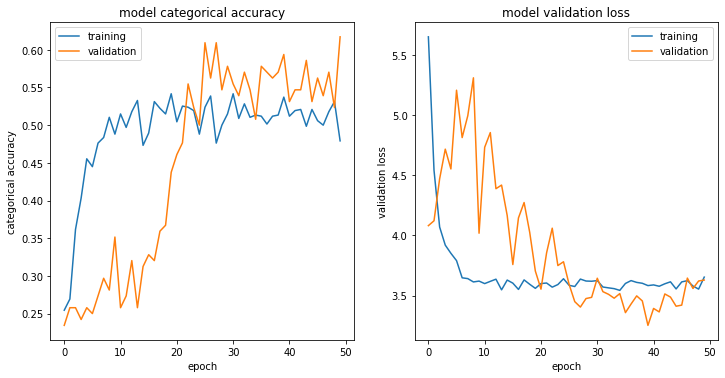

In [43]:
plt.subplots(figsize=(10,5))
plt.tight_layout()
display_training_curves(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'categorical accuracy', 121)
display_training_curves(history.history['loss'], history.history['val_loss'], 'validation loss', 122)

The above plots shows the model accuracy increases steadily after 9th iterations with some spikes between 50-60% marks. Where as validation accuracy took a upward trend from 17-18th iterations and stays above training accuracy. Which is a good sign. 

Similarly, as the training loss decsreases the validation loss also decreases. 

In [44]:
!find . -name "Jyotisekhar_Conv3D_best_model.h5"

./Jyotisekhar_init_2020-05-2515_01_47.916612/Jyotisekhar_Conv3D_best_model.h5
./Jyotisekhar_init_2020-05-2514_32_40.029232/Jyotisekhar_Conv3D_best_model.h5
./Jyotisekhar_init_2020-05-2515_06_16.406265/Jyotisekhar_Conv3D_best_model.h5
./Jyotisekhar_init_2020-05-2514_21_55.741381/Jyotisekhar_Conv3D_best_model.h5
./Jyotisekhar_init_2020-05-2514_44_43.193158/Jyotisekhar_Conv3D_best_model.h5


In [45]:
! cp ./Jyotisekhar_init_2020-05-2514_44_43.193158/Jyotisekhar_Conv3D_best_model.h5 /mnt/jm/'My Drive'/MLData
! ls -lhtr /mnt/jm/'My Drive'/MLData/Jyotisekhar_Conv3D_best_model.h5

-rw------- 1 root root 6.9M May 25 15:55 '/mnt/jm/My Drive/MLData/Jyotisekhar_Conv3D_best_model.h5'


### Model Conv2D + GRU RNN

Using the same number of convulotional layer for this model. Adding time stamp components by adding the time distribued layer into the outout of CNN dense layer. We need to wrap the Conv2D within TimeDistributed which will ensure that Conv2D is applied to each timestep. That is

model.add(TimeDistributed(conv2D_model, input_shape=(time_steps, width, height, num_chanels))

Also before passing it to RNN (GRU) we need to flatten it either by Flatten layer or GlobalMaxPooling2D layer. We need to make shure you wrap them within TimeDistributed or else we loose time-step dimention.

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

#write your model here

from keras.regularizers import l2
# channels last is the format used by tensorflow 
K.set_image_data_format('channels_last')

num_classes = 5
img_h=100
img_w=100
#img_depth=len(folder_list[:10]) * 3  # no_of_image * channels
#img_depth=len(folder_list[:10])

def get_modelCov2D_GRU(img_depth=None):
    
    if img_depth is None:
      img_depth=len(train_doc[:10])
    
    model = Sequential()
    model.add(TimeDistributed(Conv2D(32, (3, 3, 3), strides=(1,1,1), padding='same', input_shape=(img_depth,img_h,img_w,3))))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2, 2)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3, 3), strides=(1,1,1), padding='same')))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2, 2)))
    
    model.add(TimeDistributed(Conv2D(128, (3, 3, 3), strides=(1,1,1), padding='same')))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2, 2)))
    
    ## Addoing one dense layer
    model.add(TimeDistributed(Dense(128, kernel_regularizer = l2(0.01))))

    # Adding GRU layer
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(output_dim = 128,activation='tanh',return_sequences=True,dropout=0.25))

    model.add(Flatten())
        
    # Adding fully connected and 5-softmax layer
    model.add(Dense(num_classes, activation='softmax', name='modelCNN_RNN'))
        
    return model

In [47]:
no_of_image=25
batch_size=32
num_epochs=50
sgd = optimizers.SGD(lr=0.1, clipnorm=1.)
#sgd=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  # models and generators use 25 images for each of 100s batch_size
model=get_model3D(no_of_image)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

curr_dt_time=datetime.datetime.now()
model_name = 'Jyotisekhar_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/' 
if not os.path.exists(model_name):
    os.mkdir(model_name)
filepath=model_name + "Jyotisekhar_Conv_best_model.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                save_best_only=True, save_weights_only=False, mode='min', period=1)
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.01, mode='auto',
                patience=5, min_lr=0, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

# train/val data set generators
train_generator = generator(train_path, train_doc, batch_size, no_of_image)
val_generator = generator(val_path, val_doc, batch_size, no_of_image)

# steps oer epoch
steps_per_epoch, validation_steps = getStepsPerEpoch(batch_size,train_doc,val_doc)

# fit model 
history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, 
       epochs=num_epochs, verbose=True, callbacks=callbacks_list, 
       validation_data=val_generator, validation_steps=validation_steps, 
       class_weight=None, workers=1, initial_epoch=0)

Epoch 1/50
Source path =  ./Project_data/val ; batch size = 32


Source path =  ./Project_data/train ; batch size = 32
21/21 [==============================] - 69s 3s/step - loss: 5.6821 - categorical_accuracy: 0.2530 - val_loss: 4.0821 - val_categorical_accuracy: 0.2422

Epoch 00001: val_loss improved from inf to 4.08213, saving model to Jyotisekhar_init_2020-05-2515_56_22.560673/Jyotisekhar_Conv2DGRU_best_model.h5
Epoch 2/50
21/21 [==============================] - 55s 3s/step - loss: 4.3467 - categorical_accuracy: 0.3423 - val_loss: 4.1781 - val_categorical_accuracy: 0.1719

Epoch 00002: val_loss did not improve from 4.08213
Epoch 3/50
21/21 [==============================] - 55s 3s/step - loss: 4.1417 - categorical_accuracy: 0.3482 - val_loss: 4.2991 - val_categorical_accuracy: 0.2266

Epoch 00003: val_loss did not improve from 4.08213
Epoch 4/50
21/21 [==============================] - 56s 3s/step - loss: 3.8711 - categorical_accuracy: 0.4092 - val_loss: 4.3640 - val_categorical_a

In [49]:
!cp Jyotisekhar_init_2020-05-2515_56_22.560673/Jyotisekhar_Conv2DGRU_best_model.h5 /mnt/jm/'My Drive'/MLData
!ls -lhtr /mnt/jm/'My Drive'/MLDataJyotisekhar_Conv2DGRU_best_model.h5

ls: cannot access '/mnt/jm/My Drive/MLData/Jyotisekhar_init_2020-05-2515_56_22.560673/Jyotisekhar_Conv2DGRU_best_model.h5': No such file or directory


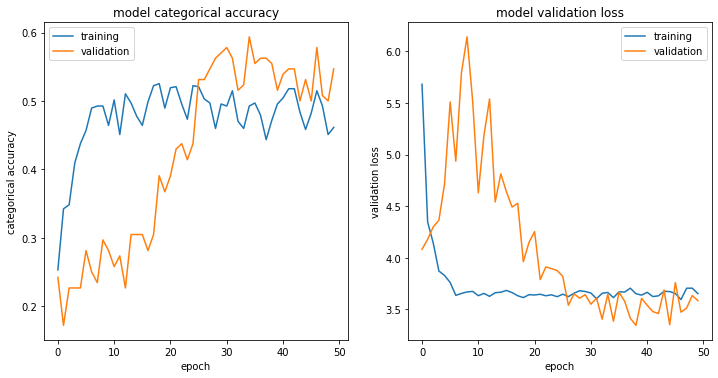

In [48]:
plt.subplots(figsize=(10,5))
plt.tight_layout()
display_training_curves(history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 'categorical accuracy', 121)
display_training_curves(history.history['loss'], history.history['val_loss'], 'validation loss', 122)